In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Importing the datasets

In [2]:
df_sample = pd.read_csv('Data\\sampleSubmission.csv')
df_test = pd.read_csv('Data\\test.csv')
df_train = pd.read_csv('Data\\train.csv')

<AxesSubplot:>

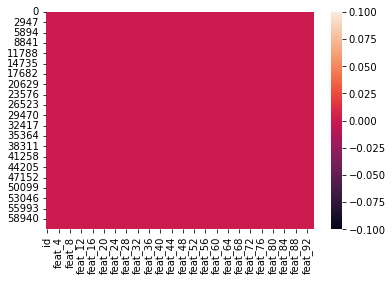

In [3]:
sns.heatmap(df_train.isnull())

<AxesSubplot:>

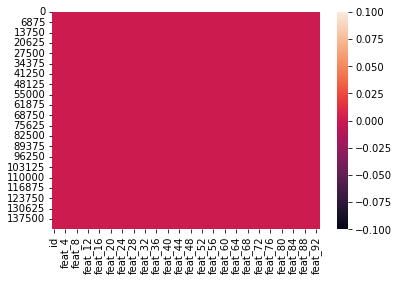

In [4]:
sns.heatmap(df_test.isnull())

In [5]:
df_train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


#### Feature Scaling

In [3]:
id_test = df_test['id']
df_train = df_train.drop('id',axis=1)
df_test = df_test.drop('id',axis=1)

In [4]:
cols = df_test.columns
for col in cols:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
col = df_train.columns
col = col[:-1]

In [6]:
target = df_train['target']
df_train = df_train.drop('target',axis=1)

scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

In [7]:
df_train = pd.DataFrame(df_train,columns=col)
df_test = pd.DataFrame(df_test,columns=col)

In [8]:
target = pd.DataFrame(target)
df_train = pd.concat([df_train,target],axis=1)

In [11]:
df_train = pd.concat([df_train,target],axis=1)

#### Train Test Split

In [12]:
X = df_train.drop('target',axis=1)
y = df_train['target']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [17]:
X_train = X_train.reset_index()
y_train = y_train.reset_index()
X_test = X_test.reset_index()
y_test = y_test.reset_index()

X_train = X_train.drop('index',axis=1)
y_train = y_train.drop('index',axis=1)
X_test = X_test.drop('index',axis=1)
y_test = y_test.drop('index',axis=1)

#### LGBM Classifier

In [20]:
from lightgbm import LGBMClassifier

In [53]:
model = LGBMClassifier()
model.fit(X,y)
pred = model.predict_proba(df_test)

In [54]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [36]:
y_test = pd.get_dummies(y_test)
y_test.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [41]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.4945497160795294

In [55]:
pred = pd.concat([id_test,pred],axis=1)

In [57]:
pred.to_csv('pred_lgbm1.csv',index=False)

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression(max_iter=100000000000000)
model.fit(X,y)
pred = model.predict_proba(df_test)

In [64]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [62]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.6421053948057572

In [65]:
pred = pd.concat([id_test,pred],axis=1)

In [67]:
pred.to_csv('pred_logistics.csv')

#### Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [77]:
model = GaussianNB()
model.fit(X,y)
pred = model.predict_proba(df_test)

In [78]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [76]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

7.399071609755427

In [79]:
pred = pd.concat([id_test,pred],axis=1)

In [80]:
pred.to_csv('pred_naive.csv')

#### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
model = DecisionTreeClassifier()
model.fit(X,y)
pred = model.predict_proba(df_test)

In [92]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [90]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

10.046832176929426

In [94]:
pred = pd.concat([id_test,pred],axis=1)

In [95]:
pred.to_csv('pred_decision.csv')

#### Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
model = RandomForestClassifier()
model.fit(X,y)
pred = model.predict_proba(df_test)

In [105]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [103]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.6121665154954143

In [106]:
pred = pd.concat([id_test,pred],axis=1)

In [108]:
pred.to_csv('pred_random_forest.csv')

#### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
model = KNeighborsClassifier(n_neighbors=80)
model.fit(X,y)
pred = model.predict_proba(df_test)

In [165]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [163]:
from sklearn.metrics import log_loss
log_loss(y_test,pred)

0.7657696496280787

In [167]:
pred = pd.concat([id_test,pred],axis=1)

In [168]:
pred.to_csv('pred_KNN.csv')

#### Bagging Decision Tree

In [169]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [176]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X, y)
pred = model.predict_proba(df_test)

In [177]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [175]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

1.643571245698317

In [178]:
pred = pd.concat([id_test,pred],axis=1)

In [179]:
pred.to_csv('pred_bagging.csv')

#### Boosting 

In [180]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [237]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=20,max_depth=10),n_estimators=75,learning_rate=0.4)
model.fit(X, y)
pred = model.predict_proba(df_test)

In [238]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [236]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.719441994312806

In [239]:
pred = pd.concat([id_test,pred],axis=1)

In [240]:
pred

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.000003,0.214014,3.007665e-01,4.244790e-01,6.658351e-10,0.000021,0.060712,0.000004,1.802438e-06
1,2,0.002249,0.005456,1.232862e-02,5.248025e-04,8.015604e-06,0.250711,0.001510,0.725275,1.938088e-03
2,3,0.000058,0.000002,2.660881e-07,5.914493e-07,1.492348e-09,0.998805,0.000006,0.000188,9.405460e-04
3,4,0.000004,0.504400,4.617128e-01,3.133915e-02,6.002846e-08,0.000157,0.001055,0.000033,1.298261e-03
4,5,0.012353,0.000240,8.478540e-05,7.349081e-07,2.540377e-05,0.006271,0.004303,0.852093,1.246303e-01
...,...,...,...,...,...,...,...,...,...,...
144363,144364,0.058101,0.136948,9.288164e-03,4.221189e-04,2.269982e-09,0.705396,0.018532,0.045710,2.560240e-02
144364,144365,0.000016,0.480978,3.343638e-01,6.312410e-02,5.454606e-07,0.000106,0.121397,0.000010,3.918315e-06
144365,144366,0.000011,0.405706,3.179930e-01,2.742280e-01,1.957266e-09,0.000117,0.001930,0.000004,9.804034e-06
144366,144367,0.000001,0.530895,4.025625e-02,4.276687e-01,5.439647e-07,0.000010,0.001161,0.000007,1.706909e-07


In [241]:
pred.to_csv('pred_boosting.csv')

#### XG Boost

In [242]:
from xgboost import XGBClassifier

In [253]:
y_train['target'] = y_train['target'].apply(lambda x:int(x[-1])-1)

In [278]:
y = pd.DataFrame(y)
y['target'] = y['target'].apply(lambda x:int(x[-1])-1)

In [280]:
model = XGBClassifier()
model.fit(X,y)
pred = model.predict_proba(df_test)

In [281]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [284]:
pred = pd.concat([id_test,pred],axis=1)

In [272]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.4936935872300778

In [286]:
pred.to_csv('pred_xgb.csv',index=False)

#### Neural Network

In [13]:
y_train = pd.get_dummies(y_train)
#y_train['target'] = y_train['target'].apply(lambda x: 'Class_' + str(x))
y_train.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [90]:
y = pd.get_dummies(y)
#y_train['target'] = y_train['target'].apply(lambda x: 'Class_' + str(x))
y.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [14]:
#y_test['target'] = y_test['target'].apply(lambda x: 'Class_' + str(x))
y_test = pd.get_dummies(y_test)
y_test.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [63]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

In [135]:
model=models.Sequential()
model.add(layers.Dense(94,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(47,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(24,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9,activation='softmax'))

In [136]:
earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [137]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [138]:
#model.fit(X,y,epochs=252,batch_size=256)
model.fit(X_train,y_train,epochs=252,batch_size=256,validation_data=(X_test,y_test), callbacks=earlyStop)

Epoch 1/252
218/218 [==============================] - 2s 6ms/step - loss: 2.0630 - accuracy: 0.2598 - val_loss: 1.6687 - val_accuracy: 0.4850
Epoch 2/252
218/218 [==============================] - 1s 4ms/step - loss: 1.6318 - accuracy: 0.4326 - val_loss: 1.2071 - val_accuracy: 0.5792
Epoch 3/252
218/218 [==============================] - 1s 4ms/step - loss: 1.3764 - accuracy: 0.5108 - val_loss: 1.1158 - val_accuracy: 0.5842
Epoch 4/252
218/218 [==============================] - 1s 5ms/step - loss: 1.2858 - accuracy: 0.5425 - val_loss: 1.0704 - val_accuracy: 0.6330
Epoch 5/252
218/218 [==============================] - 1s 5ms/step - loss: 1.2387 - accuracy: 0.5610 - val_loss: 1.0378 - val_accuracy: 0.6461
Epoch 6/252
218/218 [==============================] - 1s 5ms/step - loss: 1.2016 - accuracy: 0.5772 - val_loss: 1.0139 - val_accuracy: 0.6505
Epoch 7/252
218/218 [==============================] - 1s 4ms/step - loss: 1.1616 - accuracy: 0.5871 - val_loss: 0.9889 - val_accuracy: 0.6508

Epoch 58/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9105 - accuracy: 0.6854 - val_loss: 0.7726 - val_accuracy: 0.7232
Epoch 59/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9130 - accuracy: 0.6860 - val_loss: 0.7748 - val_accuracy: 0.7222
Epoch 60/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9143 - accuracy: 0.6856 - val_loss: 0.7747 - val_accuracy: 0.7211
Epoch 61/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9085 - accuracy: 0.6876 - val_loss: 0.7754 - val_accuracy: 0.7229
Epoch 62/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9042 - accuracy: 0.6873 - val_loss: 0.7778 - val_accuracy: 0.7233
Epoch 63/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9032 - accuracy: 0.6878 - val_loss: 0.7730 - val_accuracy: 0.7248
Epoch 64/252
218/218 [==============================] - 1s 4ms/step - loss: 0.9048 - accuracy: 0.6901 - val_loss: 0.7695 - val_accuracy:

Epoch 115/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8868 - accuracy: 0.6925 - val_loss: 0.7780 - val_accuracy: 0.7258
Epoch 116/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8883 - accuracy: 0.6922 - val_loss: 0.7681 - val_accuracy: 0.7243
Epoch 117/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8783 - accuracy: 0.6950 - val_loss: 0.7713 - val_accuracy: 0.7283
Epoch 118/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8878 - accuracy: 0.6923 - val_loss: 0.7698 - val_accuracy: 0.7248
Epoch 119/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8832 - accuracy: 0.6917 - val_loss: 0.7729 - val_accuracy: 0.7264
Epoch 120/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8728 - accuracy: 0.6967 - val_loss: 0.7747 - val_accuracy: 0.7274
Epoch 121/252
218/218 [==============================] - 1s 4ms/step - loss: 0.8776 - accuracy: 0.6948 - val_loss: 0.7775 - val_ac

<AxesSubplot:>

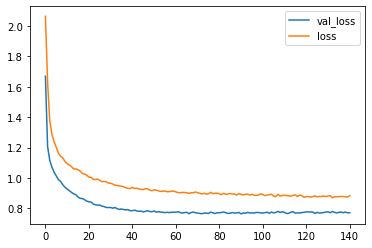

In [139]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses[['val_loss','loss']].plot()

In [142]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [143]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.7676331921294721

In [132]:
pred = pd.concat([id_test,pred],axis=1)
pred.to_csv('pred_neuralNetwork1.csv',index=False)

#### SVM

In [20]:
from sklearn.svm import SVC

In [23]:
model = SVC(probability=True)
model.fit(X_train,y_train)
pred = model.predict_proba(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
pred = pd.DataFrame(pred)
pred.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [27]:
y_test = pd.get_dummies(y_test)
y_test.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']

In [30]:
from sklearn.metrics import log_loss
log_loss(y_true = y_test,y_pred = pred)

0.5826971856931722

In [96]:
id_test = pd.DataFrame(id_test)

In [97]:
logistic = pd.read_csv('pred_logistics.csv')
naive = pd.read_csv('pred_naive.csv')
knn = pd.read_csv('pred_KNN.csv')
bag = pd.read_csv('pred_bagging.csv')
boost = pd.read_csv('pred_boosting.csv')
randomForest = pd.read_csv('pred_random_forest.csv')
nn = pd.read_csv('pred_neuralNetwork.csv')

In [99]:
logistic = logistic.drop('Unnamed: 0',axis=1)
logistic = pd.concat([id_test,logistic],axis=1)
logistic.to_csv('pred_logistics.csv',index=False)

In [100]:
naive = naive.drop('Unnamed: 0',axis=1)
naive = pd.concat([id_test,naive],axis=1)
naive.to_csv('pred_naive.csv',index=False)

In [101]:
knn = knn.drop('Unnamed: 0',axis=1)
knn = pd.concat([id_test,knn],axis=1)
knn.to_csv('pred_KNN.csv',index=False)

In [102]:
bag = bag.drop('Unnamed: 0',axis=1)
bag = pd.concat([id_test,bag],axis=1)
bag.to_csv('pred_bagging.csv',index=False)

In [103]:
boost = boost.drop('Unnamed: 0',axis=1)
boost = pd.concat([id_test,boost],axis=1)
boost.to_csv('pred_boosting.csv',index=False)

In [104]:
randomForest = randomForest.drop('Unnamed: 0',axis=1)
randomForest = pd.concat([id_test,randomForest],axis=1)
randomForest.to_csv('pred_random_forest.csv',index=False)

In [105]:
nn = nn.drop('Unnamed: 0',axis=1)
nn = pd.concat([id_test,nn],axis=1)
nn.to_csv('pred_neuralNetwork.csv',index=False)

In [106]:
nn = pd.read_csv('pred_neuralNetwork.csv')